### Deconvolution


Deconvolution compresses the basic wavelet in the recorded seismogram, attenuates reverberations and short-period multiples, thus increases temporal resolution and yields a representation of subsurface reflectivity. (SEG Wiki)

As we already known that seismic trace is the result of reflectivity convoluted by wavelet, as shown in figure below,
<img src='1.png'/>

![](1.png)
source: Waskito P

In this occasion, it will be expalined how to create real deconvolution by transforming into matrix.

firstly, it will be created the syntetic wavelet using Ricker and Ormsby functions, the wavelet then convolve with seismic traces provided in the file (trace.txt).

So, after determining wavelet and seismic traces, now we can invers to find the reflectivity.

<img src='2.jpg'/>
source: Waskito P

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from waveletsyn import ricker
from waveletsyn import ormsby

#### Ricker Wavelet

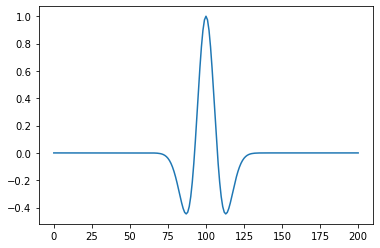

In [2]:
trace = np.loadtxt('trace.txt')
fdom = 30                            #dominant frequency
tn = 201                             #lenght      
dt = 1                               #sampling rate
t, w = ricker(fdom, tn, dt)
plt.plot(w)
plt.show()

Then, we the wavelet is made in matrix transform.

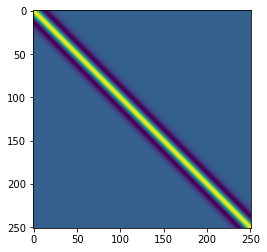

In [3]:
W = np.eye(len(trace), len(trace))
for i in np.arange(0, len(trace), 1):
    W[:, i] = np.convolve(W[:, i], w, 'same')
plt.imshow(W)
plt.show()

Since the matrix is singular in relation to a frequency that has zero amplitude, so it cannot be inverted, therefore a pre-whitening is made.

The following will be compared between seismic traces without and using Prewhitening.

##### Without using Prewhitening

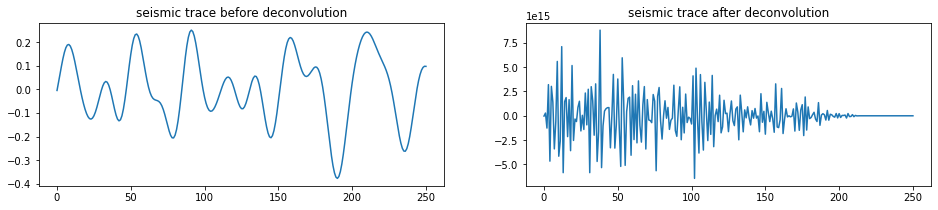

In [4]:
W = np.eye(len(trace), len(trace))
for i in np.arange(0, len(trace), 1):
    W[:, i] = np.convolve(W[:, i], w, 'same')
Sdecon = np.linalg.inv(W)@trace                   #invers matrix

plt.figure(num=None, figsize=(16,3))
plt.subplot(1,2,1)
plt.title('seismic trace before deconvolution')
plt.plot(trace)
plt.subplot(1,2,2)
plt.title('seismic trace after deconvolution')
plt.plot(Sdecon)
plt.show()

##### After using Prewhitening

This prewhitening can sharpen the resolution and bring up events that did not exist before.

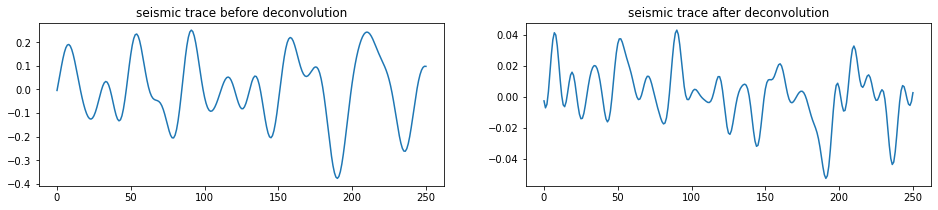

In [5]:
W = np.eye(len(trace), len(trace))
for i in np.arange(0, len(trace), 1):
    W[:, i] = np.convolve(W[:, i], w, 'same')

prew = 0.01                                      #Prewhitening
W = W + np.eye(W.shape[0], W.shape[1])*prew

Sdecon = np.linalg.inv(W)@trace                 #invers matrix


plt.figure(num=None, figsize=(16,3))
plt.subplot(1,2,1)
plt.title('seismic trace before deconvolution')
plt.plot(trace)
plt.subplot(1,2,2)
plt.title('seismic trace after deconvolution')
plt.plot(Sdecon)
plt.show()

#### Ormsby Wavelet

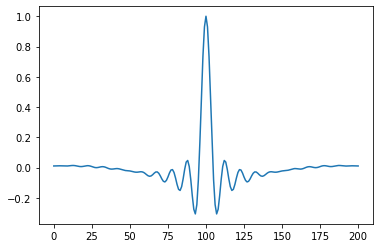

In [11]:
trace = np.loadtxt('trace.txt')
lt = 201                             #lenght      
sr = 1                               #sampling rate
f1 = 5                               #frequency 1
f2 = 10                              ##frequency 2
f3 = 90                              ##frequency 3
f4 = 110                              ##frequency 4
tm, wv = ormsby(f1,f2,f3,f4, lt, sr)
plt.plot(wv)
plt.show()

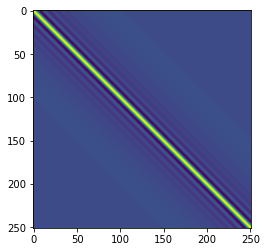

In [12]:
W = np.eye(len(trace), len(trace))
for i in np.arange(0, len(trace), 1):
    W[:, i] = np.convolve(W[:, i], wv, 'same')
    
plt.imshow(W)
plt.show()

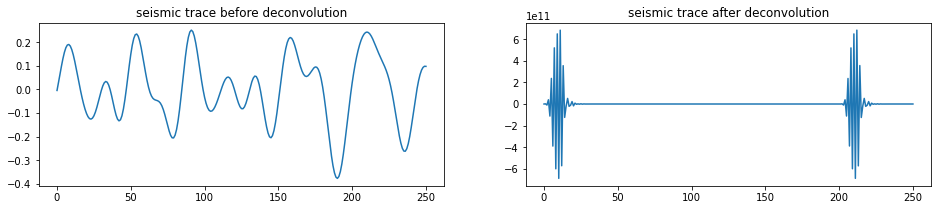

In [14]:
W = np.eye(len(trace), len(trace))
for i in np.arange(0, len(trace), 1):
    W[:, i] = np.convolve(W[:, i], wv, 'same')
Sdecon = np.linalg.inv(W)@trace                   #invers matrix

plt.figure(num=None, figsize=(16,3))
plt.subplot(1,2,1)
plt.title('seismic trace before deconvolution')
plt.plot(trace)
plt.subplot(1,2,2)
plt.title('seismic trace after deconvolution')
plt.plot(Sdecon)
plt.show()

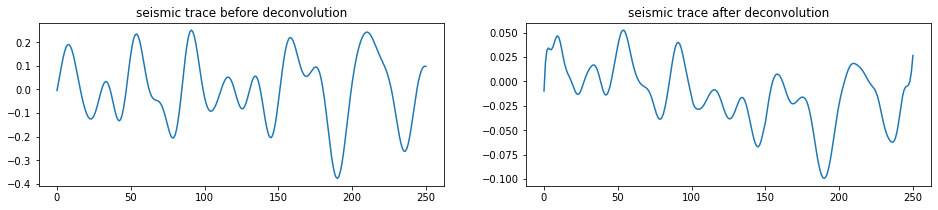

In [15]:
W = np.eye(len(trace), len(trace))
for i in np.arange(0, len(trace), 1):
    W[:, i] = np.convolve(W[:, i], wv, 'same')

prew = 0.1                                      #Prewhitening
W = W + np.eye(W.shape[0], W.shape[1])*prew

Sdecon = np.linalg.inv(W)@trace


plt.figure(num=None, figsize=(16,3))
plt.subplot(1,2,1)
plt.title('seismic trace before deconvolution')
plt.plot(trace)
plt.subplot(1,2,2)
plt.title('seismic trace after deconvolution')
plt.plot(Sdecon)
plt.show()